## Clustering and k-means algorithm

Clusteing: grouping "similar" objects into sets(clusters)

In [25]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

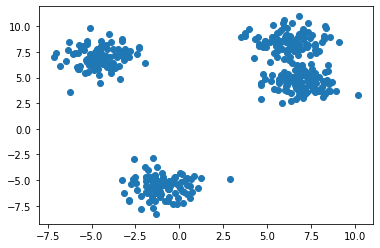

In [26]:
# dataset with 4 clusters
X,y = make_blobs(n_samples = 400, centers = 4, cluster_std = 1)
plt.scatter(X[:,0], X[:,1])

In [27]:
# k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4)

In [28]:
# labels
labels = kmeans.labels_
# cluster centers
centers = kmeans.cluster_centers_

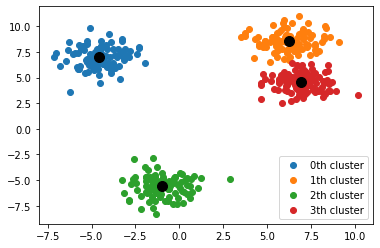

In [32]:
# plot clusters
for i in range(4):
    plt.scatter(X[labels==i,0], X[labels==i,1], label=str(i)+'th cluster')
    plt.scatter(centers[i,0],centers[i,1], c='k', s=100)
    plt.legend()

In [33]:
# create new points and assign to closest cluster
new_points = np.array([
    [-5,-5],
    [7.5,6],
    [1,3]
])

In [34]:
kmeans.predict(new_points)

array([2, 3, 3])

In [35]:
# Javi's custom decision region function
def plot_decision_regions(model,X):
    
    # extract feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
    except:
        print('something went wrong...')
        
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #  assign grid points to clusters
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot Voronoi regions
    plt.contourf(Z, extent=(x_min,x_max,y_min,y_max),cmap='Pastel2_r')
    plt.contour(Z, extent=(x_min,x_max,y_min,y_max),linewidths=1,colors='k')
    
    # plot data
    plt.scatter(X[:,0],X[:,1],color='k',s=15)

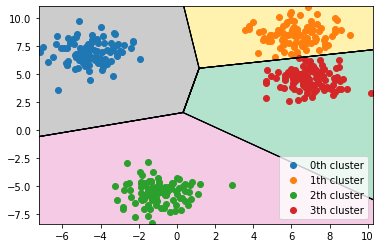

In [38]:
plot_decision_regions(kmeans,X)
for i in range(4): # 4 clusters
    plt.scatter(X[labels==i,0], X[labels==i,1], label=str(i)+'th cluster')
    plt.legend()


## Say we have 3 clusters
- k = # of clusters, which is 3
- clusters: C1, C2, and C3
- Inertia = 1/m * sum i=1 to k(sum (distance(x,Mi)^2)). In this case Mi = some mean of a cluster
- center of a cluster OR mean notated as: m1, m2, m3
- m = # of points

## Choosing number of clusters

In [39]:
kmeans.inertia_

811.4028788667971

In [43]:
from sklearn.cluster import KMeans

inertias = []
for k in range(1,20):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak o

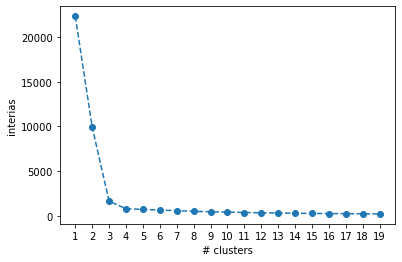

In [56]:
# Note that in this graph, at 3 there is an "elbow". However this doesn't always appear
plt.plot(range(1,20),inertias, 'o--')
plt.xlabel('# clusters')
plt.ylabel('interias')
plt.xticks(range(1,20))
plt.show()

## Silhouette Coefficient
- Say some random cluster i, there is a point X
- For each point X: a = (1/cluster size) *  sum distance((x,y)^2)
- j = second closest cluster to X
- b = 1/(cluster j size) * sum distance((x,y)^2)
- Silhouette coefficient
- s = (b-a)/(max(a,b))
- Silhouette score:
- mean silhouette coefficient

In [63]:
from sklearn.metrics import silhouette_score

In [65]:
sil_scores = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sil_scores.append(silhouette_score(X,kmeans.labels_))

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak o

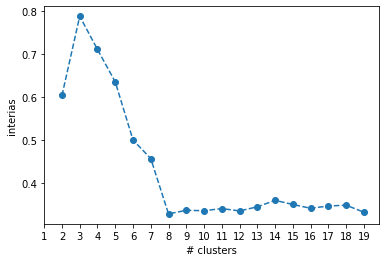

In [73]:
plt.plot(range(2,20),sil_scores, 'o--')
plt.xlabel('# clusters')
plt.ylabel('interias')
plt.xticks(range(1,20))
plt.show()

## Silhouette diagram 

In [75]:
# import function
def plot_silhouette_diagram(model,X):
    from sklearn.metrics import silhouette_samples
    from matplotlib.ticker import FixedLocator, FixedFormatter
    from matplotlib import cm
    
    # get cluster labels, cluster centers, number of clusters, and silhouete scores
    labels = model.labels_
    centers = model.cluster_centers_
    k = len(np.unique(labels))
    silhouette_coefficients = silhouette_samples(X,labels)
    
    # plot silhouette diagrams
    plt.figure(figsize=(15,10))
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[labels == i]
        coeffs.sort()
        color = cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos+len(coeffs)),0,coeffs,facecolor=color,edgecolor=color,alpha=0.7)
        
        ticks.append(pos + len(coeffs)//2)
        pos += len(coeffs) + padding
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    
    plt.axvline(x=silhouette_score(X,labels),color='red',linestyle='--')

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


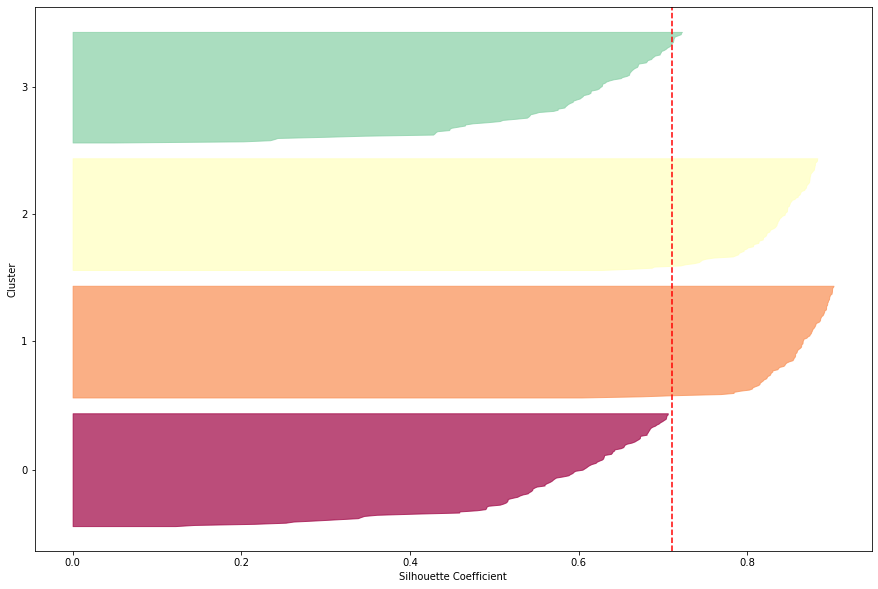

In [80]:
# number of clusters
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
plot_silhouette_diagram(kmeans,X)

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


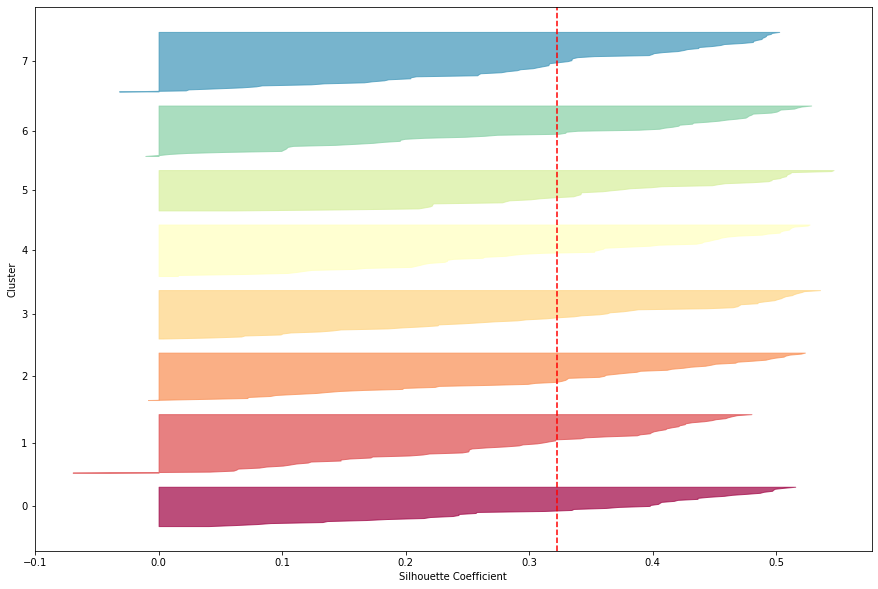

In [81]:
# number of clusters
# 8 is too many as the red line is lower than the graph above
k = 8
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
plot_silhouette_diagram(kmeans,X)